<a href="https://colab.research.google.com/github/alexis12895/TFG_practica/blob/main/Redes_neuronales_conceptos/Descenso_del_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El descenso del gradiente es una tecnica de optimizacion y matematicamente encontrar los puntos mas bajos del coste, consiguiendo un valor de coste bajo en funcion de unos parametros. Se usa para funciones no CONVENXAS

In [ ]:
import numpy as np
import scipy as sc  #Extiende numpy con funciones cientficas

import matplotlib.pyplot as plt #Para visualizar datos

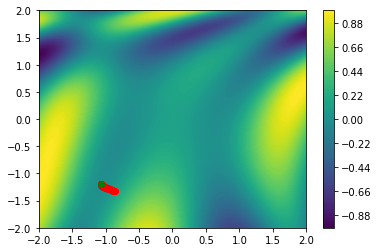

In [ ]:
#vamos a optimizar una funcion

#funcion anonima con lambda
#func = lambda th: np.sin(1 / 2 * x ** 2 - 1 / 4 * y ** 2 + 3) * np.cos(2 * x + 1 - np.e ** y) #th es un argumento , que es la nomencalruta para referirise al vector de parametros, con la letra z que es th
func = lambda th: np.sin(1 / 2 * th[0] ** 2 - 1 / 4 * th[1] ** 2 + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1]) #es un vector que ya contiene las variables x e y, por eso hemos cambiado estas

res = 100
_X = np.linspace(-2, 2, res)  #decimos que queremos un vector que vaya de -2 a 2 y con unas 100 cordenadas
_Y = np.linspace(-2, 2, res)  #decimos que queremos un vector que vaya de -2 a 2 y con unas 100 cordenadas

_Z = np.zeros((res, res)) #guardara los valores de aplicar la funcion

#Recorremos los elementos del vector _X y para cade elemento devuelve su indice(ix) y su valor(x)
for ix, x in enumerate(_X):
  for iy, y in enumerate(_Y):
    _Z[iy, ix] = func([x, y]) #_Z es una matriz y por eso le madamos primero las filas(eje y ,iy)  y luego las columnas(eje x, ix)


#para visualizar la vista de pajaro
plt.contourf(_X, _Y, _Z, 100) #estamos viendo una superficie tridimensional, la zona oscura son los picos
plt.colorbar()

#generamos un punto aleatorio
Theta = np.random.rand(2) * 4 - 2  #es un vector con valores aleatorios

#Generamos una copia antes de las derivadas
_T = np.copy(Theta)

h = 0.001 #es el incremente que le daremos a nuestro vector Z
lr = 0.001  #el ratio de aprendizaje

plt.plot(Theta[0], Theta[1], 'o', c='white')  #Dibujamos el movimiento del punto hacia su descenso - PUNTO INICIAL

grad = np.zeros(2) # un vector con dos elementos y vamos actualizando nuestros parametros

for _ in range(1000): #el numero de repeticiones que hara
  #Mediante derivadas parciales conseguimos ese punto mas bajo, mediante el metodo de pequeñas diferencias
  for it, th in enumerate(Theta):

    _T = np.copy(Theta)

    _T[it] = _T[it] + h

    derv = (func(_T) - func(Theta)) / h #calculamos la diferencia entre la derivada que tenemos y el valor que teniamos anteriormente y como es un ratio se ha de dividir por el incremento del calculo -> obtenemos la pendiente d movernos en el eje de zsubcero y asi en la siguiente iteracion lo hara con zsub1 Y ASI OBTENEMOS EL GRADIENTE

    grad[it] = derv

  Theta = Theta - lr * grad

  if(_ % 10 == 0):  #cada 100 iteraciones
    plt.plot(Theta[0], Theta[1], 'o', c='red')

plt.plot(Theta[0], Theta[1], 'o', c='green')  #PUNTO FINAL


plt.show()